# retenmod

This is a python port of the R package [foretell](https://cran.r-project.org/web/packages/foretell/foretell.pdf). This projects customer retention rates, see [*“How to Project Customer Retention” Revisited: The Role of Duration Dependence* (Fader et al., 2018)](https://www.sciencedirect.com/science/article/pii/S1094996818300057) for the original formulation and description of the models. 

To install, just use pip:

    pip install retenmod

Only dependencies are scipy and numpy. For a simple example of use for the BdW model:

In [1]:
import retenmod
surv = [100, 86.9, 74.3, 65.3, 59.3]
res = retenmod.bdw(surv,6)

print('Parameter Estimates')
print(res.params)

print('\nProjections')
print(res.proj)

Parameter Estimates
[0.25936277 1.7227105  1.5842661 ]

Projections
[100.          86.91457201  74.19302745  65.47868459  59.29349012
  54.66117454  51.03695705  48.10442197  45.6687666   43.60356138
  41.82301709]


Here is an example taken from [Koper et al. (2002)](https://www.ojp.gov/sites/g/files/xyckuh241/files/media/document/193428.pdf) on police staff retentions. 

![](https://andrewpwheeler.files.wordpress.com/2021/06/staffretention.png)

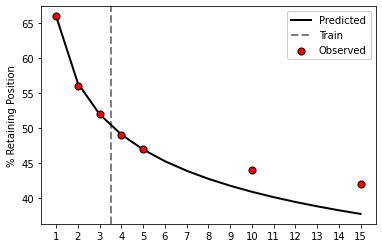

In [2]:
import matplotlib.pyplot as plt

large = [100,66,56,52,49,47,44,42]
time = [0,1,2,3,4,5,10,15]

# Only fitting with the first 3 values
train, ext = 4, 15
lrg_bdw = retenmod.bdw(large[0:train],ext - train + 1)

# Showing predicted vs observed
pt = list(range(16))
fig, ax = plt.subplots()
ax.plot(pt[1:], lrg_bdw.proj[1:],label='Predicted', 
        c='k', linewidth=2, zorder=-1)
ax.scatter(time[1:],large[1:],label='Observed', 
           edgecolor='k', c='r', s=50, zorder=1)
ax.axvline(train - 0.5, label='Train', color='grey', 
           linestyle='dashed', linewidth=2, zorder=-2)
ax.set_ylabel('% Retaining Position')
ax.legend(facecolor='white', framealpha=1)
plt.xticks(pt[1:])
plt.show()